## Feature Selection Advanced House Price Prediction

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [239]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [176]:
train_data = pd.read_csv('train.csv')
dataset=pd.read_csv('X_train.csv')
target = 'SalePrice'

In [177]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,0.75,1.0,0.666667,0.500,0.949275,0.883333,0.0,0.0,1.000000,1.000000,0.666667,0.12250,0.666667,1.0,1.000000,0.75,0.75,0.25,1.000000,0.125089,0.8,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.461538,1.0,0.00,0.0,0.75,0.346154,0.666667,0.4,0.368280,0.666667,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.4375,0.333333,1.0,0.75,0.6,0.555556,0.875,0.753623,0.433333,0.0,0.0,0.285714,0.142857,0.000000,0.00000,0.333333,1.0,0.666667,0.75,0.75,1.00,0.666667,0.173281,0.8,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.0,0.25,0.5,0.75,0.259615,0.666667,0.4,0.309140,0.666667,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,0.75,1.0,0.666667,0.500,0.934783,0.866667,0.0,0.0,1.000000,1.000000,0.666667,0.10125,0.666667,1.0,1.000000,0.75,0.75,0.50,1.000000,0.086109,0.8,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.307692,1.0,0.25,0.5,0.75,0.339744,0.666667,0.4,0.408602,0.666667,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.7500,0.666667,1.0,0.75,1.0,0.666667,0.500,0.311594,0.333333,0.0,0.0,0.142857,0.428571,0.000000,0.00000,0.333333,1.0,0.333333,0.50,1.00,0.25,0.666667,0.038271,0.8,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.50,0.384615,1.0,0.25,1.0,0.25,0.330128,0.333333,0.6,0.431452,0.666667,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.0000,0.666667,1.0,0.75,1.0,0.777778,0.500,0.927536,0.833333,0.0,0.0,1.000000,1.000000,0.666667,0.21875,0.666667,1.0,1.000000,0.75,0.75,0.75,1.000000,0.116052,0.8,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.50,0.538462,1.0,0.25,0.5,0.75,0.336538,0.666667,0.6,0.561828,0.666667,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
dataset.shape, train_data.shape

((2919, 92), (1460, 81))

In [179]:
## Capture the dependent feature
# y=train_data[[target]]
# dataset[target] = y[target]

In [180]:
## drop independent feature from dataset
# X=dataset.drop(['Id','SalePrice'],axis=1)

In [181]:
data = dataset.copy()
test_data = data.iloc[len(train_data):]
data = data.iloc[:len(train_data)]
test_data.drop(target, axis=1, inplace=True)
data.drop('Id', axis=1, inplace=True)
# train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data[target])
# train_X=train[train.columns[1:]]
# train_Y=train[train.columns[:1]]
# test_X=test[test.columns[1:]]
# test_Y=test[test.columns[:1]]
# X=data[data.columns[1:]]
# Y=data[target]

In [182]:
data.shape, train_data.shape, test_data.shape

((1460, 91), (1460, 81), (1459, 91))

In [183]:
data.columns, test_data.columns

(Index(['SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
        'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Gar

In [184]:
X = data.drop(target, axis=1)
y = data[target]

In [226]:

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.0015, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)


SelectFromModel(estimator=Lasso(alpha=0.0015, random_state=0))

In [227]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False])

In [228]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 77
selected features: 39
features with coefficients shrank to zero: 38


In [230]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive',
       'ScreenPorch', 'YrSold', 'SaleCondition', 'LotFrontagenan'],
      dtype='object')

In [231]:
# stopppp
# tempX = X.copy()
# tempy = y.copy()
# temp_test_data = test_data.copy()

In [232]:
selected_feat = list(selected_feat)

In [233]:
data = pd.merge(X[selected_feat], y, left_index=True, right_index=True)
test_data = test_data[['Id']+selected_feat]
# jkhlkj
# train,test=train_test_split(X,test_size=0.3,random_state=0,stratify=y)
# train_X=train[train.columns[1:]]
# train_Y=train[train.columns[:1]]
# test_X=test[test.columns[1:]]
# test_Y=test[test.columns[:1]]
# y=X[target]
# X=X[X.columns[1:]]

In [234]:
X.shape, y.shape, train_data.shape, test_data.shape, data.shape

((1460, 77), (1460,), (1460, 81), (1459, 40), (1460, 40))

In [235]:
# test_data.head()

In [236]:
import datetime as dt
start = dt.datetime.now()

#Your algorithm

stop = dt.datetime.now()
execution_time = stop-start
print("\n"+"Execution time: " + str (execution_time)+"\n")


Execution time: 0:00:00.000027



In [248]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# =========================
import warnings
warnings.filterwarnings("ignore")

# ==================================================================
file = 'your_dataset.csv'
target = 'SalePrice'
dataset = data
# ==================================================================

# Load the preprocessed dataset
# dataset = pd.read_csv(file)

# Split the dataset into features and target variable
X = dataset.drop(target, axis=1)
y = dataset[target]

# Split the dataset into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define a list of regressors with their respective hyperparameter grids for tuning
regressors = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {
        'alpha': [0.01, 0.1, 1, 10]
    }),
    # ('Lasso', Lasso(), {
    #     'alpha': [0.01, 0.1, 1, 10]
    # }),
    # ('ElasticNet', ElasticNet(), {
    #     'alpha': [0.01, 0.1, 1, 10],
    #     'l1_ratio': [0.25, 0.5, 0.75]
    # }),
    # ('Support Vector Machine', SVR(), {
    #     'C': [0.01, 0.1, 1, 10],
    #     'kernel': ['linear', 'rbf'],
    # }),
    # ('Random Forest', RandomForestRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [None, 5, 10],
    # }),
    # ('AdaBoost', AdaBoostRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.1, 0.01, 0.001],
    # }),
    # ('K-Nearest Neighbors', KNeighborsRegressor(), {
    #     'n_neighbors': [3, 5, 7],
    # }),
    # ('Decision Tree', DecisionTreeRegressor(), {
    #     'max_depth': [None, 5, 10],
    # }),
    # ('Multi-Layer Perceptron', MLPRegressor(), {
    #     'hidden_layer_sizes': [(100,), (50, 50)],
    #     'activation': ['relu', 'logistic'],
    #     'alpha': [0.0001, 0.001, 0.01],
    # }),
    # ('Gradient Boosting', GradientBoostingRegressor(), {
    #     'learning_rate': [0.1, 0.01, 0.001],
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [3, 5, 10],
    # }),
    # ('Gradient Boosting', GradientBoostingRegressor(), {
    #     'learning_rate': [0.1, 0.01, 0.001],
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [3, 5, 10],
    #     'subsample': [0.8, 0.9, 1.0],
    #     'min_samples_split': [2, 5, 10],
    #     'min_samples_leaf': [1, 2, 4],
    #     'max_features': ['auto', 'sqrt', 'log2'],
    #     # 'loss': ['quantile', 'huber']
    # }),
    # ('Support Vector Machine', SVR(), {
    #     'C': [0.1, 1.0, 10.0],
    #     'kernel': ['linear', 'rbf', 'poly'],
    #     'degree': [2, 3],
    #     'gamma': ['scale', 'auto'],
    #     'epsilon': [0.1, 0.01, 0.001]
    # }),
]

# Train and evaluate each regressor with hyperparameter tuning
results = {}
for name, regressor, param_grid in regressors:
    # Perform grid search
    grid_search = GridSearchCV(regressor, param_grid, cv=5)
    # grid_search = RandomizedSearchCV(regressor, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)
    train_y_pred = best_model.predict(X_train_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    train_r2 = r2_score(y_train, train_y_pred)
    
    # Store the results
    results[name] = {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2, 'Train R^2 Score': train_r2, 'Best Model': best_model}


print('Dataset size:', dataset.shape)
# Print the results
for name, metrics in results.items():
    print('--------------------------------------------------')
    print(f'{name}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value}')
    

# Select the best model based on a chosen metric (e.g., highest R^2 Score
print('\n==================================================')
best_model = max(map(lambda x:(results[x]['R^2 Score'], x), results))[1]
model = results[best_model]['Best Model']
print('Best Model is:',best_model, results[best_model]['R^2 Score'])
print('==================================================\n')

plt.xticks(rotation=60)
plt.bar(x=list(results.keys()), height=list(map(lambda x: results[x]['R^2 Score'], results.keys())))

Dataset size: (1460, 40)
--------------------------------------------------
Linear Regression:
Mean Squared Error: 0.01670489648537617
Mean Absolute Error: 0.09075455633832599
R^2 Score: 0.9104839957886351
Train R^2 Score: 0.90031377708211
Best Model: LinearRegression()
--------------------------------------------------
Ridge:
Mean Squared Error: 0.016898035128334942
Mean Absolute Error: 0.09066815968339721
R^2 Score: 0.9094490298077558
Train R^2 Score: 0.8997619673673214
Best Model: Ridge(alpha=1)
--------------------------------------------------
Support Vector Machine:
Mean Squared Error: 0.017263501414773362
Mean Absolute Error: 0.09133949614849426
R^2 Score: 0.9074906170953769
Train R^2 Score: 0.9205393710048732
Best Model: SVR(C=10.0, degree=2, gamma='auto')

Best Model is: Linear Regression 0.9104839957886351



TypeError: map() must have at least two arguments.

In [196]:
stopppppp

NameError: name 'stopppppp' is not defined

Support Vector Machine {'Mean Squared Error': 0.01662528864317918, 'Mean Absolute Error': 0.0903901647187409, 'R^2 Score': 0.9109105878326865, 'Train R^2 Score': 0.8973871318677258, 'Best Model': SVR(C=1, kernel='linear')}


<BarContainer object of 6 artists>

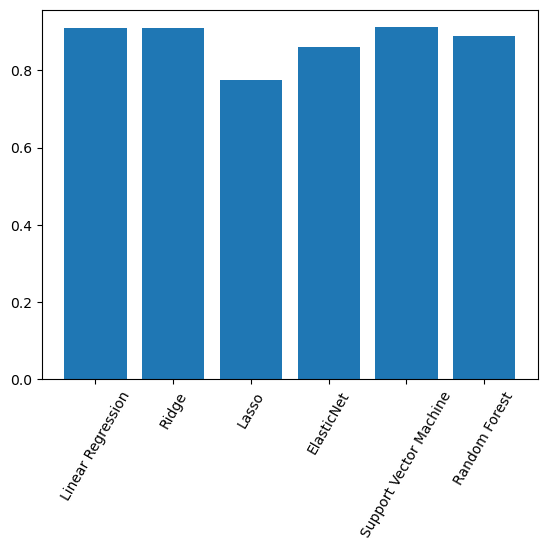

In [247]:
print(best_model, results[best_model])
plt.xticks(rotation=60)
plt.bar(x=list(results.keys()), height=list(map(lambda x: results[x]['R^2 Score'], results.keys())))

In [ ]:
# tm = GradientBoostingRegressor(max_depth=5, max_features='auto', min_samples_leaf=2, alpha=0.8)
# tm.fit(X_train_scaled, y_train)
    
# # Get the best model from the grid search
# # best_model = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = tm.predict(X_test_scaled)
# train_y_pred = tm.predict(X_train_scaled)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# train_r2 = r2_score(y_train, train_y_pred)

# # Store the results
# {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2, 'Train R^2 Score': train_r2, 'Best Model': best_model}


In [ ]:
print('Dataset size:', dataset.shape)
# Print the results
for name, metrics in results.items():
    print('--------------------------------------------------')
    print(f'{name}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value}')
    

# Select the best model based on a chosen metric (e.g., highest R^2 Score
print('\n==================================================')
best_model = max(map(lambda x:(results[x]['R^2 Score'], x), results))[1]
model = results[best_model]['Best Model']
print('Best Model is:',best_model, results[best_model]['R^2 Score'])
print('==================================================\n')

Dataset size: (1460, 83)
--------------------------------------------------
Linear Regression:
Mean Squared Error: 1208836769.7798014
Mean Absolute Error: 21432.35867467751
R^2 Score: 0.8424008657353951
Train R^2 Score: 0.8604452715658297
Best Model: LinearRegression()
--------------------------------------------------
Ridge:
Mean Squared Error: 1372577189.8023107
Mean Absolute Error: 20940.951889472064
R^2 Score: 0.8210536093606814
Train R^2 Score: 0.8346718968454301
Best Model: Ridge(alpha=10)
--------------------------------------------------
Lasso:
Mean Squared Error: 1215760095.5812223
Mean Absolute Error: 21087.18644599762
R^2 Score: 0.8414982540844156
Train R^2 Score: 0.8588159610157966
Best Model: Lasso(alpha=10)
--------------------------------------------------
Gradient Boosting:
Mean Squared Error: 614613381.3286934
Mean Absolute Error: 15787.51154909642
R^2 Score: 0.9198712851674029
Train R^2 Score: 0.983214644463199
Best Model: GradientBoostingRegressor(n_estimators=200)



In [238]:
model.fit(X, y)
y_ = model.predict(test_data.drop('Id', axis=1))
output = pd.DataFrame({'Id': test_data.Id, target: np.exp(y_)})
output.to_csv('submission.csv', index=False)
print("Submission successfully saved!")

Submission successfully saved!


In [ ]:
k = list(results.keys())
params = list(results[k[0]].keys())
print(k)
print(params)

['Linear Regression', 'Ridge', 'Lasso']
['Mean Squared Error', 'Mean Absolute Error', 'R^2 Score', 'Best Model']


In [ ]:
best_model = max(map(lambda x:(results[x]['R^2 Score'], x), results))[1]
best_model

'Linear Regression'

TypeError: float() argument must be a string or a real number, not 'LinearRegression'

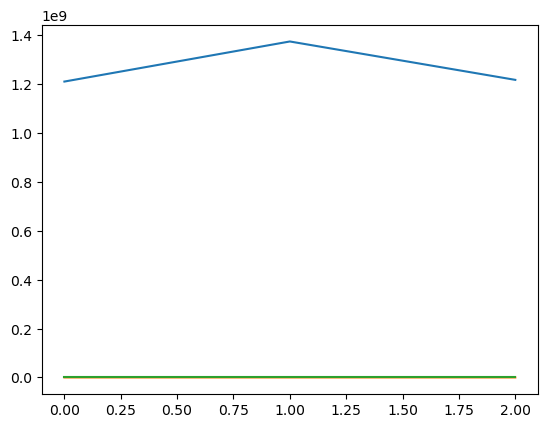

In [ ]:
for err in params:
    plt.plot(list(map(lambda x:results[x][err] , k)), label=err)
plt.legend()

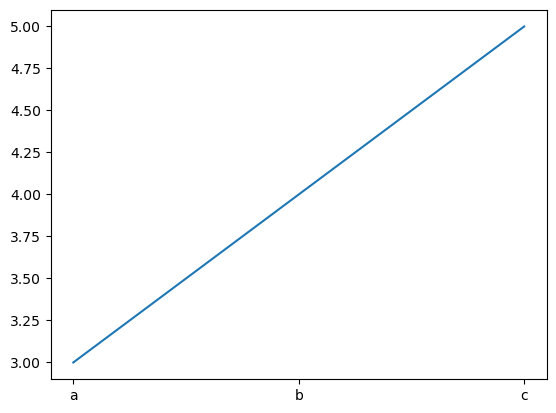

In [ ]:
# plt.plot(list('abc'), [3,4,5])

In [251]:
kaggledir = '/kaggle/input/housepricedata/'
train_data = pd.read_csv('train.csv')
dataset=pd.read_csv('X_train.csv')
target = 'SalePrice'


# y=train_data[[target]]
# dataset[target] = y[target]

X=dataset.drop(['Id','SalePrice'],axis=1)
data = dataset.copy()
test_data = data.iloc[len(train_data):]
data = data.iloc[:len(train_data)]
test_data.drop(target, axis=1, inplace=True)
data.drop('Id', axis=1, inplace=True)

X = data.drop(target, axis=1)
y = data[target]

feature_sel_model = SelectFromModel(Lasso(alpha=0.0003, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

feature_sel_model.get_support()
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))
selected_feat = list(selected_feat)
data = pd.merge(X[selected_feat], y, left_index=True, right_index=True)
test_data = test_data[['Id']+selected_feat]

# ******************************************************************************************************************************
import datetime as dt
start = dt.datetime.now()

#Your algorithm

# ==================================================================
# ==================================================================

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# =========================
import warnings
warnings.filterwarnings("ignore")

# ==================================================================
file = 'your_dataset.csv'
target = 'SalePrice'
dataset = data
# ==================================================================


# Load the preprocessed dataset
# dataset = pd.read_csv(file)

# Split the dataset into features and target variable
X = dataset.drop(target, axis=1)
y = dataset[target]

# Split the dataset into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define a list of regressors with their respective hyperparameter grids for tuning
regressors = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {
        'alpha': [0.01, 0.1, 1, 10]
    }),
    # ('Lasso', Lasso(), {
    #     'alpha': [0.01, 0.1, 1, 10]
    # }),
    # ('ElasticNet', ElasticNet(), {
    #     'alpha': [0.01, 0.1, 1, 10],
    #     'l1_ratio': [0.25, 0.5, 0.75]
    # }),
    ('Support Vector Machine', SVR(), {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
    }),
    # ('Random Forest', RandomForestRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [None, 5, 10],
    # }),
    # ('Gradient Boosting', GradientBoostingRegressor(), {
    #     'learning_rate': [0.1, 0.01, 0.001],
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [3, 5, 10],
    # }),
#     ('AdaBoost', AdaBoostRegressor(), {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.1, 0.01, 0.001],
#     }),
#     ('K-Nearest Neighbors', KNeighborsRegressor(), {
#         'n_neighbors': [3, 5, 7],
#     }),
#     ('Decision Tree', DecisionTreeRegressor(), {
#         'max_depth': [None, 5, 10],
#     }),
#     ('Multi-Layer Perceptron', MLPRegressor(), {
#         'hidden_layer_sizes': [(100,), (50, 50)],
#         'activation': ['relu', 'logistic'],
#         'alpha': [0.0001, 0.001, 0.01],
#     }),
#     ('Gradient Boosting', GradientBoostingRegressor(), { 
#         'learning_rate': [0.1, 0.01],
#     'n_estimators': [50, 100],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['auto', 'sqrt'],
#         'loss': ['quantile', 'huber']
#     }),
]

# Train and evaluate each regressor with hyperparameter tuning
results = {}
for name, regressor, param_grid in regressors:
    # Perform grid search
    grid_search = GridSearchCV(regressor, param_grid, cv=5)
#     grid_search = RandomizedSearchCV(regressor, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)
    train_y_pred = best_model.predict(X_train_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    train_r2 = r2_score(y_train, train_y_pred)
    
    # Store the results
    results[name] = {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2, 'Train R^2 Score': train_r2, 'Best Model': best_model}

print('Dataset size:', dataset.shape)
# Print the results
for name, metrics in results.items():
    print('--------------------------------------------------')
    print(f'{name}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value}')
    

# Select the best model based on a chosen metric (e.g., highest R^2 Score
print('\n==================================================')
best_model = max(map(lambda x:(results[x]['R^2 Score'], x), results))[1]
model = results[best_model]['Best Model']
print('Best Model is:',best_model, results[best_model]['R^2 Score'])
print('==================================================\n')



# ==================================================================
# ==================================================================
stop = dt.datetime.now()
execution_time = stop-start
print("\n"+"Execution time: " + str (execution_time)+"\n")

total features: 90
selected features: 61
features with coefficients shrank to zero: 29
Dataset size: (1460, 62)
--------------------------------------------------
Linear Regression:
Mean Squared Error: 0.0169514891090655
Mean Absolute Error: 0.0923076123909072
R^2 Score: 0.9091625876398334
Train R^2 Score: 0.9065044025483746
Best Model: LinearRegression()
--------------------------------------------------
Ridge:
Mean Squared Error: 0.016830779785084505
Mean Absolute Error: 0.09192281236345318
R^2 Score: 0.9098094289036085
Train R^2 Score: 0.9056884019189599
Best Model: Ridge(alpha=1)
--------------------------------------------------
Support Vector Machine:
Mean Squared Error: 0.016826949426067182
Mean Absolute Error: 0.08974470089645908
R^2 Score: 0.9098299545281897
Train R^2 Score: 0.8972210982751777
Best Model: SVR(C=0.1, kernel='linear')

Best Model is: Support Vector Machine 0.9098299545281897


Execution time: 0:00:03.983862



In [252]:
print('Best Model is:',best_model, results[best_model]['R^2 Score'])


Best Model is: Support Vector Machine 0.9098299545281897
